<a href="https://colab.research.google.com/github/kenca5ey/et5003/blob/main/ET5003_KaggleCompetition_KennethCasey_20197764.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_KaggleCompetition

In [1]:
#@title Current Date
Today = '2021-10-05' #@param {type:"date"}


### Enter your details here:
**Team Number:** 5
 - **Student_ID & Name:** 20197764 Kenneth Casey
 - **Student_ID & Name:** 20157347 Robert Barrett
 - **Student_ID & Name:** 9312951 Michael Scally
 - **Student_ID & Name:** 12129798 Anthony Purcell
 - **Student_ID & Name:** 20201214 Raymond Beechinor

In [2]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = 'Final' #@param ["Draft", "Final"] {type:"raw"}
Submission = True #@param {type:"boolean"}

# INTRODUCTION

For this Etivity, the focus is to utilise NLP, Piecewise Bayesian Regression, and Bayesian Neural Network in an attempt to find the best model suited to making predictions on unseen data. The goal is to create the best model possible that can make predictions on a test set. The predictions on the test set will be submitted to kaggle for validation and the mean squared error will be used to score the accuracy of the predictions submitted.

The models explored in this notebook will be tailored to predict house prices based on several input variables. Using natural language processing we will create new more consumable features from the textual columns and examine the effects on the model accuracy using a validation set. 

As a baseline two Full Bayesian regression models will be created, one including the generated NLP features included and one excluding the NLP features. 

For the piecewise section, where there are a lot fewer training examples in each cluster than in the overall, only a model excluding the NLP features is used to avoid problems with overfitting due to too many features with too little data per cluster. 

Finally the Bayesian Neural Network will be explored, both with and without the additional NLP features included. 

To finish, the model showing the best results on the validation set will be retrained from scratch on the full training set but using the same hyperparameters. This final model will then be used to predict the submission prices for the kaggle competition.

**NLP**

Natural Language Processing (NLP) is the ability of a computer or system to understand written and spoken words just like humans do (Goldberg, 2017).  Early iterations of NLP were restricted to logic-based rules that relied on a limited set of pre-defined structured data. But human language, by its very nature, is unstructured and highly variable. Human speech is particularly challenging since one has to take into account, the fluency, volume tone etc… to understand the intent of the speaker (Yse, 2019).

The written word goes some way towards providing a structure to help a computer to understand what is being said considering the time one takes to write an essay, or a composition, writing and rewriting sentences to come up with the best way of expressing the desired thought. Further pre-processing would still be required to clean and prepare the data for consumption by an algorithm (What is Natural Language Processing? An Introduction to NLP, 2021).

The most popular methods for NLP at this moment in time use statistical machine learning and linear models although strides have been made since 2014 to move towards neural-based techniques (Brownlee, 2017).   Natural Language Processing at its core is a combination of linguistics and computer science.   The Natural Language Toolkit (NLTK) is a Python based platform that allows users to easily build applications to process human language data. NLTK is open source and contains a large set of libraries and tools. It incorporates a step-by-step approach to programming which is ideal for computer software engineers but also has the potential to enable non-technical linguistic practitioners to use it (NLTK :: Natural Language Toolkit, 2021).  

**Piecewise Bayesian Regression**

As outlined by Yang et al. (2019), piecewise regression models first splits the data into segments or clusters and utilise specific models on each of the segments. This is particularly useful when there are different relationships between the variables in the different regions (‘Segmented regression’, 2021). In such cases, the different models are better able to learn the nuances in the relationships for each cluster, rather than over generalising which may occur in the case of a single universal model. The boundaries between segments are called breakpoints. Piecewise linear regression models have found many real-world applications from image denoising to data mining (Yang et al., 2019). In our case we will apply piecewise Bayesian regression to the task of predicting house prices and the clusters used will be geographic, based on latitude and longitude values.

For an individual model we can take the linear regression formula as follows:

$$
f(x) = \alpha+\beta^T x
$$

We can then apply this in a piecewise fashion to each of the clusters as follows:

\begin{equation}
f(x) = \begin{cases}
\alpha_1+\beta_1^T x & \text{if } b_{0} \lt x \leq b_{1},\\
\alpha_2+\beta_2^T x & \text{if } b_{1} \lt x \leq b_{2},\\
...\\
\alpha_n+\beta_n^T x & \text{if } b_{n-1} \lt x \leq b_{n}\\
\end{cases}
\end{equation}

Where:

 - $x$ are the input features
 - $\alpha$ is the intercept term and
 - $\beta$ is vector of coefficients which give a weighting to the importance of each input feature. 

As (Koehrsen, 2018) outlines in his overview of Bayesian Linear Regression. For Bayesian Regression the response is drawn from a distribution rather than from a single value. The aim is to not find the single best model parameters but to get a posterior distribution for the parameters. The posterior probability stemming from Bayes Theorem can be derived and is the basis of inference using a Bayesian approach:

$Posterior = \frac{Liklihood \times Prior}{Normalization}$

A prior allows us to define as estimates any prior knowledge we have on a problem. If no prior knowledge is available then an initial guess can be used as well as taking from a a range such as a normal distribution. This will be the approach taken later in the coding section of the etivity.

The posterior is the result we get from performing Bayesian Linear Regression and is a distribution of
possible model parameters. The more smaples we have the more we can hone in on a tighter distribution.

For this etivity we will be utilising the useful library Pymc3 which was developed to allow an intuitive way to code Bayesian models in the python language (Salvatier, Wiecki and Fonnesbeck, 2016). The library allows for the compiling down to C code which optimises training times. There is built in support for gaussian modelling which will be useful in this etivity when we use the library to find a normal distribution range for the linear model parameters alpha and beta.

**Bayesian Neural Networks**

Learning algorithms using convolutional neural networks (CNN) or recurrent neural networks (RNN) allow computers to learn from massive datasets on a continual basis.   CNNs are predominantly used for image recognition whereas RNNs are best used for text and speech because they have memory. When using non-linear models these neural networks can suffer from something called “overfitting”. This happens when the data fed into a system is very similar, or too little, and the machine learning algorithm is over trained on this data. It learns irrelevant information giving it too much weight and therefore struggles to analyse any new data presented to it (What is Overfitting?, 2021).  

One solution to this is to introduce posterior interference to these neural networks. This is called a Bayesian Neural Network (BNN) This attaches a probability distribution to the data that allows the network to provide the probability of its predictions being accurate, or how confident it is that its prediction is correct (‘What is a Bayesian Neural Network?’, 2021).  


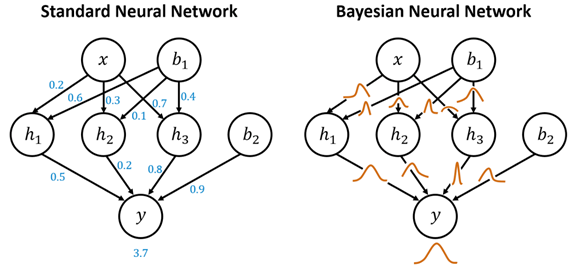

Aside from being a solution in cases where data is limited, Bayesian Neural Networks are very useful when the desired outcome is not known. In Natural Language Processing cases, the outcome is clear – create a system that can understand human language. Anything short of this is obviously an error and the system needs to be improved. But in areas like medical research where the desired result is not clear then the fact that the BNN attaches a probability to a prediction is very valuable. 
 The drawback of a Bayesian Neural Network is that it takes much longer to train and barrier to entry in terms of understanding the theory and mathematics behind the network is much steeper. 


### Dataset

The analysis of house prices has many roles in our advanced market economy and can be of great concern to many stakeholders (Ahtesham, Bawany and Fatima, 2020). For this Etivity, we will be making use of the House Price dataset which contains many metrics about houses in the Dublin region, including physical conditions, locations, number of bedrooms and others. Most importantly, the training data also features the actual house prices which we can use to train the model. The dataset also contains a test set and a cost set, which have all of the input features and the true house prices respectively. 

Some exploratory data analysis was caried out on the data to gain insights about the nature of the datapoints. Data cleaning was undertaken, and outliers and missing data were dealt with. Non useful data columns were removed. 


| Column        | Description           | 
| :------------- |:-------------:| 
| **ID**    | This is an Id field with each house having a unique value. This field was not used for model training as it is agnostic of property price. |
| **Location**    | This is a textual field specifying the area that the property is located in. This feature was not used in favour of using the more specific latitude and longitude fields. |
| **Num_Bathrooms**    | This is a numerical field which indicates the number of bathrooms that the property has. |
| **Num_Beds**    | This is a numerical field which indicates the number of beds that the property has.|
| **BER_class**    | This field indicates the Building Energy Rating. |
| **Description**    | This textual field provided a description of the property in English. NLP was used on this attribute. |
| **Services**    | This field was discarded due to missing data levels |
| **Features**    | This textual field provided information on the facilities of the property in English. Because NLP was not in the scope fo this etivity, this field was not utilised in model training. |
| **features**    | This textual field provided a description of the property features in English. NLP was used on this attribute. |
| **Latitude**    | This numerical field indicates the latitude of the property. After outliers were dealt with, this column was one of the cornerstones of the clustering and was a model feature |
| **Longitude**    | This numerical field indicates the longitude of the property. After outliers were dealt with, this column was one of the cornerstones of the clustering and was a model feature |
| **Type**    | This is a textual field indicaing the type of the property. This was one hot encoded in the data preprocessing steps. |
| **Surface**    | This is a numerical field and specifies the surface area of the property. |
| **Price**    | This is a numerical field and is the target value for out predictions |

Some of the distributions would be shown to be left skewed and log scaling was utilised to provide a more normal distribution. The standard scaler was also used to transform relevant columns into the correct range.

### Method

***The goal is to use advanced Machine Learning methods to predict House price.***

As outlined in the introduction, the objective of the etivity is to use supervised learning to train models to predict the prices of houses given input features. The training set consists of input data as well as corresponding house prices. The test dataset has the input features but no true price values which map to the test dataset. These values will be kept from us and held on kaggle where a submission of predicitions versus the true price will form the basis of the RMSE for the submission to kaggle. 

The data preparation will be handled extensively in the next section. Outliers will be detected and handled. The training data will be split into training and validation sets. To handle the various transformations and scaling a data pipeline will be set up to carry out the same manipulations on each data set. 

The models explored in this notebook will be tailored to predict house prices based on several input variables. Using natural language processing we will create new, more consumable features from the textual columns and examine the effects on the model accuracy using a validation set. The Frequency-Inverse Document Frequency (TF-IDF) values will be obtained for the various vocabulary and the most well represented vocabulary showing the highest correlation of thier TF-IDF score to Price will be selected as the additional NLP features. 

As a baseline two Full Bayesian regression models will be created, one including the generated NLP features included and one excluding the NLP features. 

For the piecewise section, where there are a lot fewer training examples in each cluster than in the overall, only a model excluding the NLP features is used to avoid problems with overfitting due to too many features with too little data per cluster. 

Once the clusters have been determined, a separate Bayesian Linear regression model is trained on each cluster (Minka, 1999). The optimal number of clusters chosen was 6 and so the piecewise linear formula became:

\begin{equation}
f(x) = \begin{cases}
\alpha_0+\beta_0^T x & \text{if } b_{0} \lt x \leq b_{1},\\
\alpha_1+\beta_1^T x & \text{if } b_{1} \lt x \leq b_{2},\\
\alpha_2+\beta_2^T x & \text{if } b_{2} \lt x \leq b_{3},\\
\alpha_3+\beta_3^T x & \text{if } b_{3} \lt x \leq b_{4},\\
\alpha_4+\beta_4^T x & \text{if } b_{4} \lt x \leq b_{5},\\
\alpha_5+\beta_5^T x & \text{if } b_{5} \lt x \leq b_{6}\\
\end{cases}
\end{equation}

Finally the Bayesian Neural Network will be explored, both with and without the additional NLP features included. We will be using the Theano library for the purposes of the Bayesian Neural Network to deal with dot products of the correct type in the etivity. 

The various results across all the models will be compared and the best performing model set-up, as trialed on the validation set, will be selected as the candidate for the submission to Kaggle.

To finish, the model showing the best results on the validation set as chosen previously will be retrained from scratch on the full training set but using the same hyperparameters. This final model will then be used to predict the submission prices for the kaggle competition.

## Imports

In [3]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
!pip install kneed

In [6]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

# Imports to aid with determining number of clusters to choose
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

In [7]:
# Scikit-learn is an open source machine learning library 
# that supports supervised and unsupervised learning
# https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error
from math import sqrt

In [8]:
# Natural Language Toolkit
# https://www.nltk.org/install.html
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer

# Stemming maps different forms of the same word to a common “stem” 
# https://pypi.org/project/snowballstemmer/
from nltk.stem import SnowballStemmer

# https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
!pip install gpy

In [10]:
import GPy as GPy
import numpy as np
import pylab as pb
import pymc3 as pm
import arviz as az

# https://theano-pymc.readthedocs.io/en/latest/
import theano

In [11]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

## Training & Test Datasets

Firsly we will get the datasets: train and test

To do this we will first connect to google drive which is where the datasets are stored:

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now we will generate the paths to the relevant files:

In [13]:
# Specifying the Google Drive path which contains the dataset
Path = '/content/drive/MyDrive/Colab Notebooks/Enrique/Data/kaggle_dataset/'

# training dataset: 
training_file = Path + "HousePrice_Train.csv"
# test dataset: 
testing_file = Path + "HousePrice_Test.csv"

We will now read in the values from the csv files and store the data in dataframes:

In [14]:
df_train = pd.read_csv(training_file)
df_test = pd.read_csv(testing_file)

### Training Dataset

#### Exploratory Data Analysis

We will now do some initial exploration of the training data available:

In [15]:
print(f"The training data has {df_train.shape[1]} columns")
print(f"The training data has {df_train.shape[0]} rows")

The training data has 14 columns
The training data has 1638 rows


In [16]:
# show first data frame rows 
df_train.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
0,1,12409116,Ongar,2,2,C3,DNG are delighted to present to the market no....,NaN,None,53.396659,-6.438791,apartment,67.00,195000
1,2,12320330,North Strand,1,2,D1,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,terraced,95.97,425000
2,3,12405953,Stepaside,3,3,A3,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,semi-detached,107.00,535000
3,4,12202582,Cabinteely,1,3,E1,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,detached,81.00,499000
4,5,12299336,Lusk,3,4,D1,'Four Seasons' comes to the market as a wonder...,NaN,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,detached,153.00,510000


In [17]:
# Generate descriptive statistics
df_train.describe()

,Index,ID,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface,Price
count,1638.000000,1.638000e+03,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1.638000e+03
mean,819.500000,1.231930e+07,2.054335,3.043346,53.350473,-6.255086,169.540695,5.547196e+05
std,472.994186,1.447540e+05,1.241259,1.379650,0.076832,0.144430,1791.793934,5.652032e+05
min,1.000000,1.118567e+07,1.000000,1.000000,52.501856,-6.497000,3.400000,1.999500e+04
25%,410.250000,1.228104e+07,1.000000,2.000000,53.294261,-6.309613,73.000000,2.950000e+05
50%,819.500000,1.238055e+07,2.000000,3.000000,53.341386,-6.247780,97.050000,3.950000e+05
75%,1228.750000,1.240548e+07,3.000000,4.000000,53.382031,-6.193982,135.000000,5.950000e+05
max,1638.000000,1.242836e+07,18.000000,27.000000,53.630588,-1.744995,72236.387140,8.900000e+06


From the above description of the data we can see that the count of the examples for the numerical columns are the same and they are not missing data.

However any outliers will need to be dealt with and transformations and scaling may be required on the data.

One hot encoding will be done for the Type column and ordinal encoding for the BER values. NLP will also be done later to create features from the textual columns.

We will now check for empty values across all of the columns

In [18]:
df_train.isnull().sum()

Index               0
ID                  0
Location            0
Num_Bathrooms       0
Num_Beds            0
BER_class         251
Description         0
Services         1061
Features            0
Latitude            0
Longitude           0
Type                0
Surface             0
Price               0
dtype: int64

We can see from the above that some BER classifications are missing. We will deal with this in the next section where we ordinally encode the values. For the Services column which is also missing some values, we will handle the missing data as part of the NLP feature generation.

#### Dealing with Outliers

We will now deal with any outliers in the training data. We will remove any properties where there are either no bedrooms or too many bedrooms, or no bathrooms or too many bathrooms. For none the reasoning is that such a property would not be liveable and so not useful for training upon. In the case of too many these are outliers that may skew the model if included.  

In [19]:
# Determine the rows with a Num_Beds outlier of 0 or greater than 10
beds_and_baths_outlier_filter = (df_train['Num_Beds'] == 0) | (df_train['Num_Beds'] > 10) | (df_train['Num_Bathrooms'] == 0) | (df_train['Num_Bathrooms'] > 9)

# Printing the number of outliers 
print(f"Removing {df_train[beds_and_baths_outlier_filter]['ID'].count()} outliers for beds and bathrooms")

# Dropping the unneeded cases
df_train.drop((df_train.loc[beds_and_baths_outlier_filter]).index, inplace=True)

Removing 3 outliers for beds and bathrooms


We will also remove any training points from latitude longitude coordinates that are situated outside Dublin.

In [20]:
longitude_outliers = (df_train['Longitude']>-6) | (df_train['Longitude']<-7)

# Extract the rows with a latitude outside of dublin
latitude_outliers = (df_train['Latitude']>54) | (df_train['Latitude']<53)

# Printing the number of outliers 
print(f"Removing {df_train[longitude_outliers | latitude_outliers]['ID'].count()} outliers for lat/long.")

# Dropping all cases where the location falls outside Dublin
df_train.drop((df_train.loc[longitude_outliers | latitude_outliers]).index, inplace=True)

Removing 1 outliers for lat/long.


With the lat/long outliers removed, we can now plot a chart of the prices across the latitude and longitudes. We will use log of prices to lessen the effect of outliers on the colour representations:

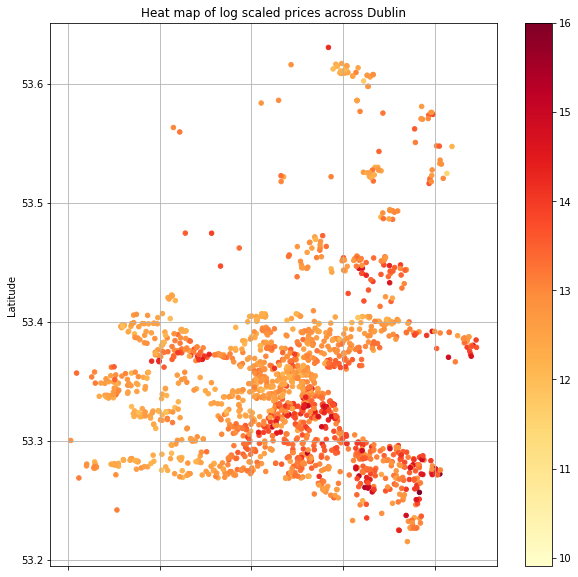

In [21]:
# Log transforming the price to remove heat map sensitivity to outliers
df_train.plot.scatter(x = 'Longitude', y = 'Latitude', c = np.log(df_train['Price']), cmap = 'YlOrRd', figsize = (10,10))
plt.title("Heat map of log scaled prices across Dublin")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.show()

Map of Dublin:

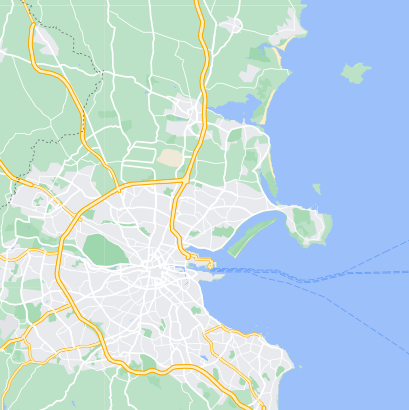

We will now remove any outliers in terms of the surface values:

In [22]:
# Determine the rows with a surface outlier lower than 25 and above 5000
surface_outlier_filter = (df_train['Surface'] < 25) | (df_train['Surface'] > 1000)

# Printing the number of outliers 
print(f"Removing {df_train[surface_outlier_filter]['ID'].count()} outliers for surface.")

# Removing these unhelpful outliers:
df_train.drop((df_train.loc[surface_outlier_filter]).index, inplace=True)

Removing 7 outliers for surface.


##### Encoding data numerically

We will now create an ordinal encoding for the BER attribute

In [23]:
# Building the mapping of value to number
ber_class_mapper = {}
ber_unique_values = df_train['BER_class'].unique().astype(str)
ber_unique_values = np.delete(ber_unique_values, np.where((ber_unique_values == 'nan') | (ber_unique_values == 'SINo666of2006exempt')))
ber_unique_values.sort()
for id, val in enumerate(ber_unique_values):
    ber_class_mapper[val] = id 

mean_ber_value = df_train[df_train['BER_class'] != 'SINo666of2006exempt']['BER_class'].replace(ber_class_mapper).mean()
ber_class_mapper['SINo666of2006exempt'] = 15
ber_class_mapper[np.nan] = mean_ber_value

# Printing the created numerical mapping
print("The BER_class values are mapped numerically as follows:")
for ber_class, mapped_val in ber_class_mapper.items():
    print(f"{ber_class} => {mapped_val}")

# Updating the dataframe with the numerical mapping
df_train['BER_class'].replace(ber_class_mapper, inplace=True)

The BER_class values are mapped numerically as follows:
A1 => 0
A2 => 1
A3 => 2
B1 => 3
B2 => 4
B3 => 5
C1 => 6
C2 => 7
C3 => 8
D1 => 9
D2 => 10
E1 => 11
E2 => 12
F => 13
G => 14
SINo666of2006exempt => 15
nan => 8.823572474377745


##### One hot encoding

Now we will one-hot encode the Type attribute

In [24]:
# One hot encoding the property_type column
df_train = pd.get_dummies(df_train, columns=['Type'], drop_first=False)

##### Distributions and Scaling

We will first declare a function to assist with plotting distributions:

In [25]:
# Declaring utility function to assist with displaying the distributions of the variables
def plot_distributions(fig, column, x, y, z, df, bins=20):
    # Box Plot
    ax1 = fig.add_subplot(x, y, z)
    ax1.set_title(f"Boxplot of the {column} attribute")
    ax1.set_ylabel(column)
    df.boxplot(column=[column])
    
    # Histogram
    ax2 = fig.add_subplot(x, y, z+1)
    ax2.set_title(f"Histogram of the {column} attribute")
    ax2.set_xlabel(column)
    ax2.set_ylabel(f'Number of {column}')
    df[column].hist(bins=20) 

Plotting the distributions to assess what transformations and scaling are required:

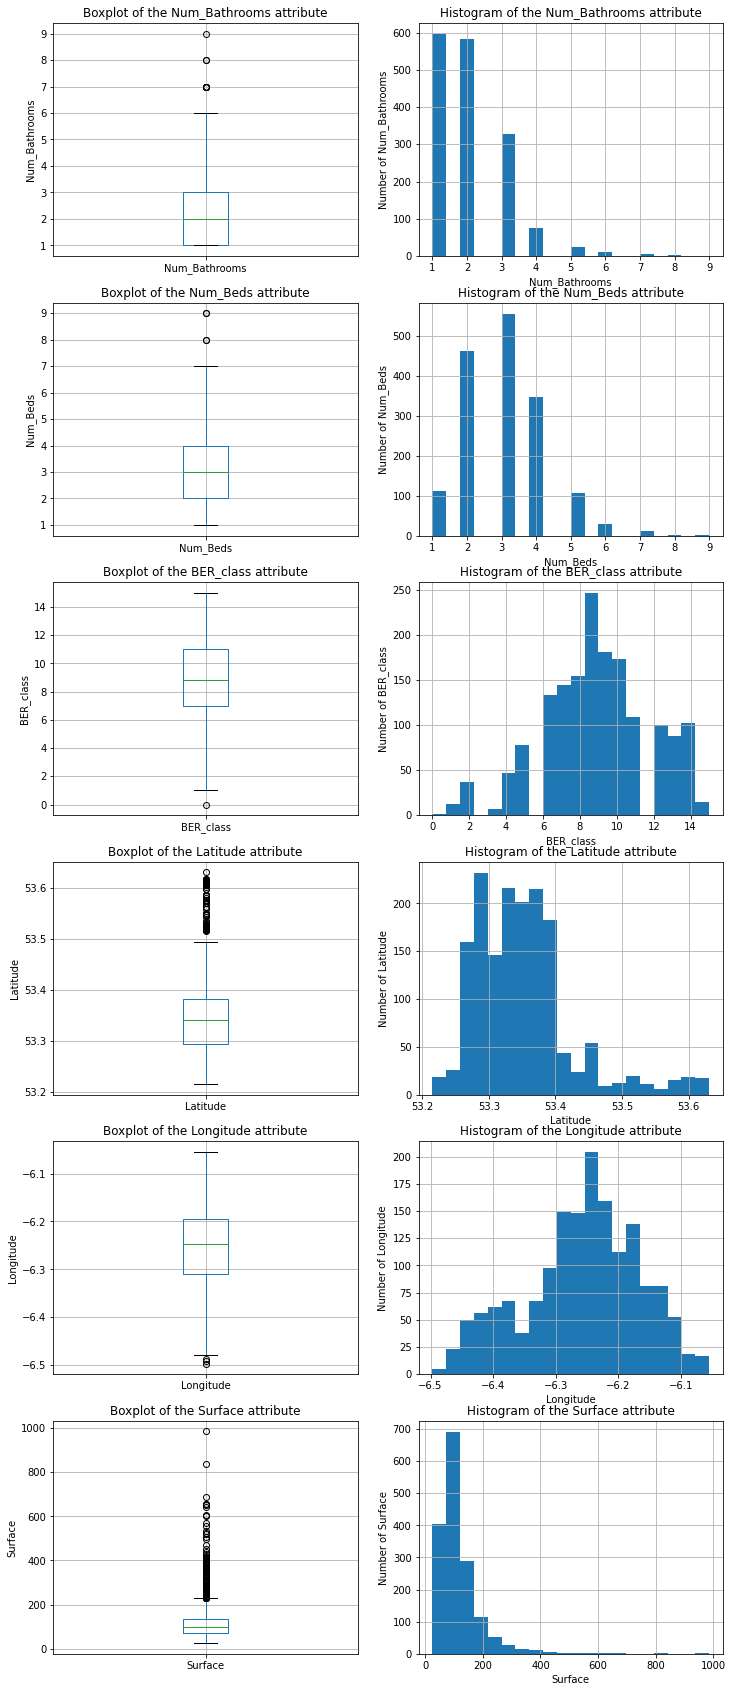

In [26]:
fig = plt.figure(figsize=(12, 30))
plot_distributions(fig, "Num_Bathrooms", 6, 2, 1, df_train)
plot_distributions(fig, "Num_Beds", 6, 2, 3, df_train)
plot_distributions(fig, "BER_class", 6, 2, 5, df_train)
plot_distributions(fig, "Latitude", 6, 2, 7, df_train)
plot_distributions(fig, "Longitude", 6, 2, 9, df_train)
plot_distributions(fig, "Surface", 6, 2, 11, df_train)

We can see from the above that the beds, bathrooms and surface are all left skewed in terms of their distribution. To normalise these a bit more we will log transform these columns. The latitude and longitude and BER class will also need to be standard scaled

#### Data Preparation Pipelines

We will now set up pipelines to aid with Data Preparations. The reason is that we want to create a training and validation set and the later also have the entire training and test set. We can achieve this by using the pipeline to carry out the required transforms and scaling: 

In [27]:
def scaling_pipeline_for_X(df_to_scale, standard_scaler_X = None, return_scaler = False):
  # Copying so that the original dataframe is not altered
  df_to_scale_copy = df_to_scale.copy()

  # Scaling attributes identified as needing to be more normal in their distributions
  df_to_scale_copy['Num_Bathrooms'] = np.log(df_to_scale_copy['Num_Bathrooms'].astype('float'))
  df_to_scale_copy['Num_Beds'] = np.log(df_to_scale_copy['Num_Beds'].astype('float'))
  df_to_scale_copy['Surface'] = np.log(df_to_scale_copy['Surface'].astype('float'))

  features_to_standard_scale = ['Latitude', 'Longitude', 'BER_class']
  # If we have not passed in a pre-defined scaler then create one 
  if standard_scaler_X is None:
    # Creating a scaler for the attributes needing to be scaled down
    # StandardScaler() will normalize the features i.e. each column of X, 
    # so each column/feature/variable will have μ = 0 and σ = 1
    standard_scaler_X = StandardScaler().fit(df_to_scale_copy[features_to_standard_scale])

  # Scaling the attributes
  df_to_scale_copy[features_to_standard_scale] = standard_scaler_X.transform(df_to_scale_copy[features_to_standard_scale])

  if return_scaler is True:
    return df_to_scale_copy, standard_scaler_X
  else:
    return df_to_scale_copy

Also setting up the pipeline for the target attributes

In [28]:
def scaling_pipeline_for_y(df_to_scale, standard_scaler_y = None, return_scaler = False):
   # Copying so that the original dataframe is not altered
  df_to_scale_copy = df_to_scale.copy()

  # Applying the log transform to the price
  df_to_scale_copy['Price'] = np.log(df_to_scale_copy['Price']).astype('float')

  if standard_scaler_y is None:
    # Creating the scaler if none was passed in
    standard_scaler_y = StandardScaler().fit(df_to_scale_copy[['Price']])

  # Scaling the target attribute
  df_to_scale_copy[['Price']] = standard_scaler_y.transform(df_to_scale_copy[['Price']])

  if return_scaler is True:
    return df_to_scale_copy, standard_scaler_y
  else:
    return df_to_scale_copy

We can now use the pipline to acquire the overall training and test set

In [29]:
df_Xn, scaler_X = scaling_pipeline_for_X(df_train, return_scaler=True)
df_yn, scaler_y = scaling_pipeline_for_y(df_train, return_scaler=True)

We will now also split to obtain a training and validation set using our pipeline

In [30]:
# split data into training and test
from sklearn.model_selection import train_test_split

# training: 80% (0.8), val: 20% (0.2) 
df_X_train, df_X_val, df_y_train, df_y_val = train_test_split(df_train, df_train[['Price']], test_size=0.2)

Using the pipeline

In [31]:
df_Xn_train, scaler_X_with_split = scaling_pipeline_for_X(df_X_train, return_scaler=True)
df_Xn_val = scaling_pipeline_for_X(df_X_val, standard_scaler_X=scaler_X_with_split)
df_yn_train, scaler_y_with_split = scaling_pipeline_for_y(df_y_train, return_scaler=True)

Checking what features are most correlated to the Price attribute 

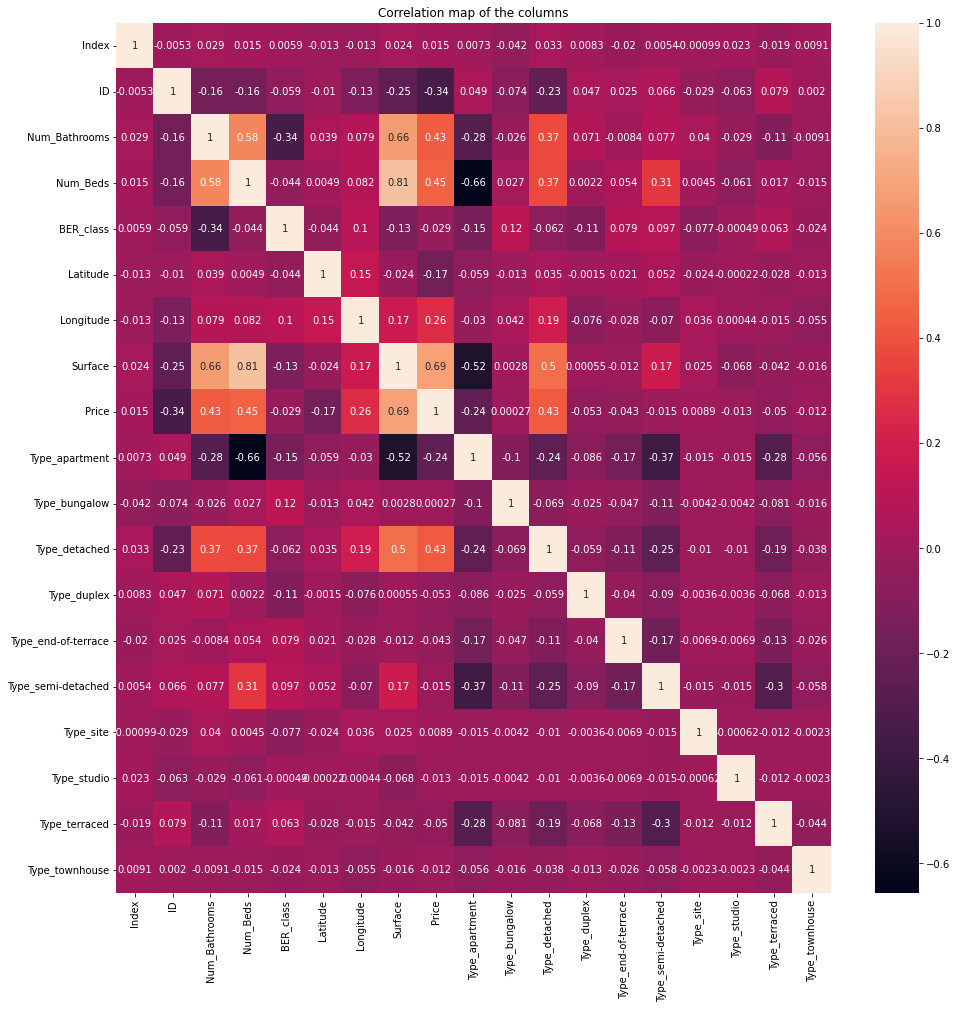

In [32]:
plt.figure(figsize=(16, 16))
plt.title("Correlation map of the columns")
sns.heatmap(df_Xn.corr(), annot=True)
plt.show()

Scaled features showing the strongest correlation with price:
- Longitude => 0.26
- Latitude => -0.17
- Surface => 0.69
- Num_Beds => 0.45
- Num_Bathrooms => 0.43
- Type_detached => 0.43
- Type_apartment => -0.24

The above features show useful correlations with house prices and will be included as features to train the model.

In [33]:
# Selecting the features upon which to train the models
featrain = ['Longitude', 'Latitude', 'Surface', 'Num_Beds', 'Num_Bathrooms', 'Type_detached', 'Type_apartment']

### Test dataset

We will now examine and prepare the test set:

In [34]:
# Generate descriptive statistics
df_test.describe()

,Index,ID,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface
count,702.000000,7.020000e+02,702.000000,702.000000,702.000000,702.000000,702.000000
mean,1989.500000,1.231545e+07,2.027066,2.987179,53.350445,-6.252411,132.603530
std,202.794231,1.420680e+05,1.071273,1.198480,0.073961,0.091600,330.347066
min,1639.000000,1.147889e+07,1.000000,1.000000,53.214227,-6.521183,32.100000
25%,1814.250000,1.227637e+07,1.000000,2.000000,53.295225,-6.304258,73.000000
50%,1989.500000,1.237928e+07,2.000000,3.000000,53.341153,-6.247799,99.200000
75%,2164.750000,1.240421e+07,3.000000,4.000000,53.381752,-6.184277,136.875000
max,2340.000000,1.242824e+07,9.000000,14.000000,53.617443,-6.057150,8576.000000


We can see from the above that there are no values missing.

We will now check to see if there are any outliers in terms of the number of beds and bathrooms.

In [35]:
# Determine the rows with a Num_Beds outlier of 0 or greater than 10
beds_and_baths_outlier_filter = (df_test['Num_Beds'] == 0) | (df_test['Num_Beds'] > 10) | (df_test['Num_Bathrooms'] == 0) | (df_test['Num_Bathrooms'] > 9)

# Printing the number of outliers for surface
print(f"Removing {df_test[beds_and_baths_outlier_filter]['ID'].count()} outliers for beds and bathrooms")
df_test[beds_and_baths_outlier_filter]

Removing 1 outliers for beds and bathrooms


,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface
256,1895,12169470,Drumcondra,6,14,C2,Smart purpose-built student accommodation inve...,"Parking,Gas Fired Central Heating",None,53.368185,-6.259181,semi-detached,420.2


We cna see that there is an extremer outlier in the test dataset in terms of the number of beds. We will deal with this outlier by bringing it to within the range on which our model will be trained. 

In [36]:
df_test['Num_Beds'].values[df_test['Num_Beds'].values > 10] = 10

Now to check if there are any outliers in terms of the location

In [37]:
longitude_outliers = (df_test['Longitude']>-6) | (df_test['Longitude']<-7)

# Extract the rows with a latitude outside of dublin
latitude_outliers = (df_test['Latitude']>54) | (df_test['Latitude']<53)

# Select all cases where the location falls outside Dublin
df_test[longitude_outliers | latitude_outliers]

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface


We can see from the above that there are no outliers in terms of the location within the test set.

Now to check for any outliers in terms of the surface

In [38]:
# Determine the rows with a surface outlier lower than 25 and above 1000
surface_outlier_filter = (df_test['Surface'] < 25) | (df_test['Surface'] > 1000)

# Printing the number of outliers for surface
df_test[surface_outlier_filter][["Surface"]]

,Surface
110,8576.0


We can see that there is a surface outlier that most likely was entered on the wrong scale. We will make an assumption that the surface was meant to be in the more reasonable realm of  85.8 rather than in the thousands.

In [39]:
df_test["Surface"].values[surface_outlier_filter] = 85.8

Encoding the Type column

In [40]:
# One hot encoding the property_type column
df_test = pd.get_dummies(df_test, columns=['Type'], drop_first=False)

Ordinally encoding the BER class using the mapper we created previously.

In [41]:
# Updating the dataframe with the numerical mapping for BER
df_test['BER_class'].replace(ber_class_mapper, inplace=True)

Finally we can again use the pipline to normalise and scale the test data:

In [42]:
df_Xn_test = scaling_pipeline_for_X(df_test, standard_scaler_X=scaler_X)

# NATURAL LANGUAGE PROCESSING

Natural language processing ([NLP](https://en.wikipedia.org/wiki/Natural_language_processing)) is a subfield of linguistics, computer science, and artificial intelligence.

* NLP concerned with the interactions between computers and human language.
* In particular how to program computers to process and analyze large amounts of natural language data. 
* The goal is a computer capable of "understanding" the contents of documents.
* Including the contextual nuances of the language within them. 
* The technology can then accurately extract information and insights contained in the documents.
* As well as categorize and organize the documents themselves. 

Now we will use NLP to extract some additional features from the dataset in order to make use of the textual columns. The approach will be to take the vocabulary that scores the highest in terms of their correlation of TF_IDF score with Price and that are well represented in terms of their counts within the data.

Creating a function to run the necessary NLP operations to extract the TF_IDF values: 

In [43]:
def run_NLP(df_for_nlp):
  df_textual = pd.DataFrame(columns=["Textual"])
  df_textual["Textual"] = df_for_nlp["Description"] + ' ' + df_for_nlp["Features"]

  # removing everything except alphabetical characters
  df_textual["Textual"] = df_textual["Textual"].str.replace("[^a-zA-Z#]", " ")

  # make all text lowercase
  df_textual['Clean_Textual'] = df_textual['Textual'].apply(lambda x: x.lower())

  swords = stopwords.words('english')

  # tokenization
  tokenized_doc = df_textual['Clean_Textual'].apply(lambda x: x.split())

  # remove stop-words
  tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in swords])

  # de-tokenization
  detokenized_doc = []
  for index in df_textual.index:
      t = ' '.join(tokenized_doc[index])
      detokenized_doc.append(t)

  # Creating and fitting the vectorizer
  vectorizer = TfidfVectorizer(stop_words='english', max_features= 300, max_df=0.5, smooth_idf=True)
  X_tfid = vectorizer.fit_transform(df_textual['Clean_Textual'])

  # Creating a dataframe with the vocab columns
  df_tfid = pd.DataFrame(X_tfid.todense(), columns=vectorizer.get_feature_names(), index=df_for_nlp.index)

  return df_tfid

Firstly we will run the NLP for the entire training dataset to extract the TF-IDF scores over the whole data: 

In [44]:
# Running the NLP operations
df_Xn_tfid = run_NLP(df_Xn)

Now we will check how correlated the TF-IDF scores are with the Price. Taking back the 50 most correlated.

In [45]:
# Extracting the 50 most correlated vocabulary items
correlations_with_price = df_Xn_tfid.corrwith(df_Xn["Price"])
most_correlated_with_price = correlations_with_price.abs().nlargest(50)

We will visualise the most correlated with Price

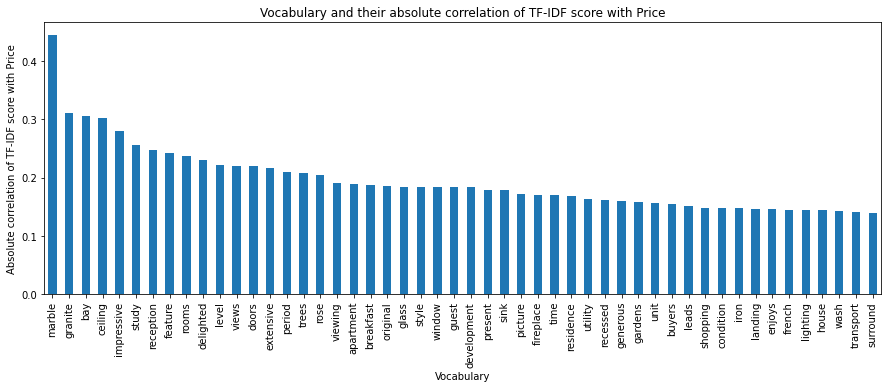

In [46]:
most_correlated_with_price.plot.bar(
  rot=0, 
  figsize=(15,5), 
  title="Vocabulary and their absolute correlation of TF-IDF score with Price",
  xlabel= "Vocabulary",
  ylabel= "Absolute correlation of TF-IDF score with Price",
)
plt.xticks(rotation=90)
plt.show()

Now we will see which of the above are also well represented within the dataset. 

In [47]:
# Getting the 50 most well represended vocabulary items
most_well_represented = df_Xn_tfid[df_Xn_tfid > 0].count().nlargest(50)

Plotting the most represetned vocabulary items

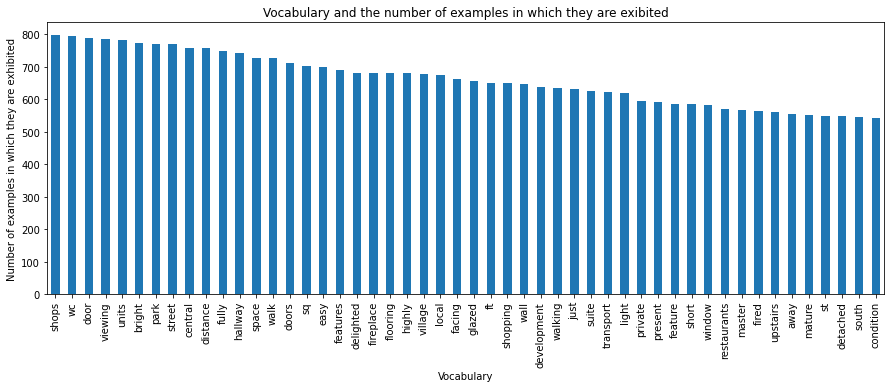

In [48]:
most_well_represented.plot.bar(
  rot=0, 
  figsize=(15,5), 
  title="Vocabulary and the number of examples in which they are exibited",
  xlabel= "Vocabulary",
  ylabel= "Number of examples in which they are exhibited",
)
plt.xticks(rotation=90)
plt.show()

Now we will extract which vocab items are well represented and have a good correlation with price. 

In [49]:
well_represented_with_good_correlations = []
set_of_most_correlated_with_price = set(most_correlated_with_price.keys())
for well_represented_key in most_well_represented.keys():
  if well_represented_key in set_of_most_correlated_with_price:
    well_represented_with_good_correlations.append(well_represented_key)

well_represented_with_good_correlations

['viewing',
 'doors',
 'delighted',
 'fireplace',
 'shopping',
 'development',
 'transport',
 'present',
 'feature',
 'window',
 'condition']

We will now visualise these

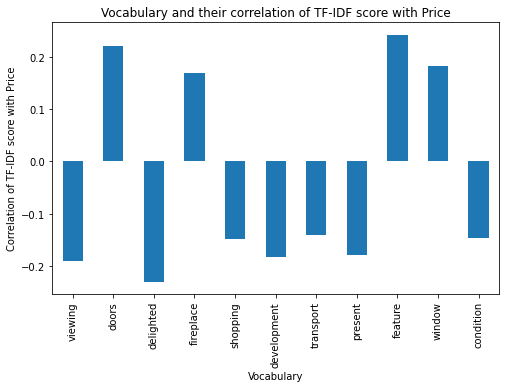

In [50]:
# Visualise the most represented and correlated with price in terms of TFIDF score
correlations_with_price[well_represented_with_good_correlations].plot.bar(
  rot=0, 
  figsize=(8,5), 
  title="Vocabulary and their correlation of TF-IDF score with Price",
  xlabel= "Vocabulary",
  ylabel= "Correlation of TF-IDF score with Price",
)
plt.xticks(rotation=90)
plt.show()

We will take these as our chosen NLP features and add to the dataset

In [51]:
chosen_NLP_feature_columns = well_represented_with_good_correlations

df_Xn[chosen_NLP_feature_columns] = df_Xn_tfid[chosen_NLP_feature_columns]

We will now create a helper to extract or create with zero any of the NLP features. This is so that the features will always be available for training even if the NLP operation does not create the features based on the particular data examples processed:

In [52]:
# Helper to extract the TF-IDF values after the NLP operations are run
def get_tfid_feature_column_values(df_tfid_matrix, chosen_NLP_feature_columns):
  for nlp_feature_column_name in chosen_NLP_feature_columns:
    if nlp_feature_column_name not in df_tfid_matrix.columns:
      df_tfid_matrix[nlp_feature_column_name] = 0

  return df_tfid_matrix[chosen_NLP_feature_columns]

#### Creating the NLP features for the split training, validation and test sets

We can now run the NLP operations for the Training, Validation and Test Sets and add the additional chosen features to each using the helper method above:

In [53]:
df_Xn_train[chosen_NLP_feature_columns] = get_tfid_feature_column_values(run_NLP(df_Xn_train), chosen_NLP_feature_columns) 
df_Xn_val[chosen_NLP_feature_columns] = get_tfid_feature_column_values(run_NLP(df_Xn_val), chosen_NLP_feature_columns) 
df_Xn_test[chosen_NLP_feature_columns] = get_tfid_feature_column_values(run_NLP(df_Xn_test), chosen_NLP_feature_columns) 

## Full Model (Base Model)

We will now run a baseline model without any NLP features and then we will include the features so that we can contrast the results:

In [54]:
# Training set, taking the input columns added and excluding the true price values
Xn_train = df_Xn_train[featrain].values

# Validation set
Xn_val = df_Xn_val[featrain].values

# Training set true prices
yn_train = df_yn_train.values

# Validation set true prices
y_val = df_y_val.values[:,0]

We will now perfrom the Multinomial Logistic Regression by instantiating and refining the parameters available in the linear equations. Namely:

 - $\alpha$, which is the intercept term:
 - $\beta$, which is a vector of coefficients which give a weighting to the importance of each input feature.

Initially a wide guess will be taken for the parameters, which will then be honed.

In [55]:
# model
with pm.Model() as model:
    #prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=100)
    #we have one beta for each column of Xn
    beta = pm.Normal('beta', mu=0, sigma=100, shape=Xn_train.shape[1])
    #prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
    #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, Xn_train.T)
    #likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn_train[:,0])

Alpha and beta are now instantiated and a normal confidence interval honed for the data. With that is place we will now fit the model to the data.

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Finished [100%]: Average Loss = 1,130.4


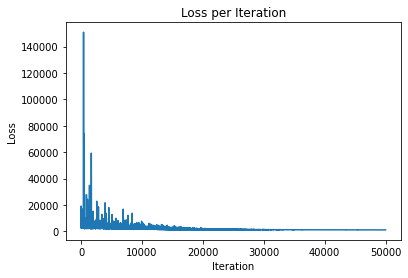

In [56]:
#number of iterations of the algorithms
iter = 50000 

# run the model
with model:
    approximation = pm.fit(iter,method='advi')
    
# check the convergence
plt.plot(approximation.hist);
plt.title('Loss per Iteration')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

We can see from the above plot that our model converged successfully.

Now we will declare the number of draws to take for the posterior

In [57]:
# samples from the posterior
posterior = approximation.sample(5000)

We can now obtain the MAE and MAPE to form a baseline performance:

In [58]:
# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_val.T)
y_pred_BLR = np.exp(scaler_y_with_split.inverse_transform(ll.reshape(-1,1)))[:,0]
print("MAE = ",(np.mean(abs(y_pred_BLR - y_val))))
print("MAPE = ",(np.mean(abs(y_pred_BLR - y_val) / y_val)))



rms = sqrt(mean_squared_error(y_val, y_pred_BLR))
print("RMSE = ", rms)

MAE =  151169.06791416294
MAPE =  0.22534112027062336
RMSE =  412330.1312040598


## Model including NLP Features

We will now rerun the above but this time with the NLP features included:

In [59]:
# All features
all_features_inc_NLP = featrain + chosen_NLP_feature_columns

In [60]:
# Training set
Xn_train = df_Xn_train[all_features_inc_NLP].values

# Validation set
Xn_val = df_Xn_val[all_features_inc_NLP].values

In [61]:
# model
with pm.Model() as model:
    #prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=100)
    #we have one beta for each column of Xn
    beta = pm.Normal('beta', mu=0, sigma=100, shape=Xn_train.shape[1])
    #prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
    #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, Xn_train.T)
    #likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn_train[:,0])

Finished [100%]: Average Loss = 1,114.6


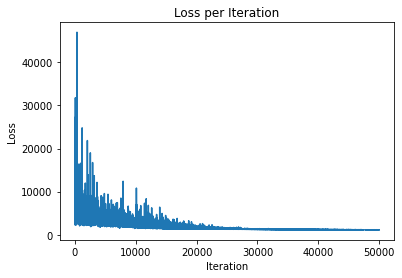

In [62]:
#number of iterations of the algorithms
iter = 50000 

# run the model
with model:
    approximation = pm.fit(iter,method='advi')
    
# check the convergence
plt.plot(approximation.hist);
plt.title('Loss per Iteration')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [63]:
# samples from the posterior
posterior = approximation.sample(5000)

In [64]:
# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_val.T)
y_pred_BLR = np.exp(scaler_y_with_split.inverse_transform(ll.reshape(-1,1)))[:,0]
print("MAE = ",(np.mean(abs(y_pred_BLR - y_val))))
print("MAPE = ",(np.mean(abs(y_pred_BLR - y_val) / y_val)))

rms = sqrt(mean_squared_error(y_val, y_pred_BLR))
print("RMSE = ", rms)

MAE =  144277.74816817706
MAPE =  0.21404737456000525
RMSE =  410809.35225869826


**Initial Comments** We can see that there has been a marginal improvement in accuracy by utilising the NLP features. This shows that some useful data was indeed garnered from them.

# PIECEWISE REGRESSION

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

In [65]:
# Training set, taking the input columns added and excluding the true price values
Xn_train = df_Xn_train[featrain].values
y_train = df_y_train[['Price']].values

# Validation set
Xn_val = df_Xn_val[featrain].values

## Clustering

We will now perform clustering of the dataset. We will be clustering by the latitude and longitude take attributes of the houses. The optimal number of clusters will first be determined.  

### Examining how many clusters to use

We will perform k-means clustering in conjuction with the elbow method to find a starting point for how many clusters to use. 

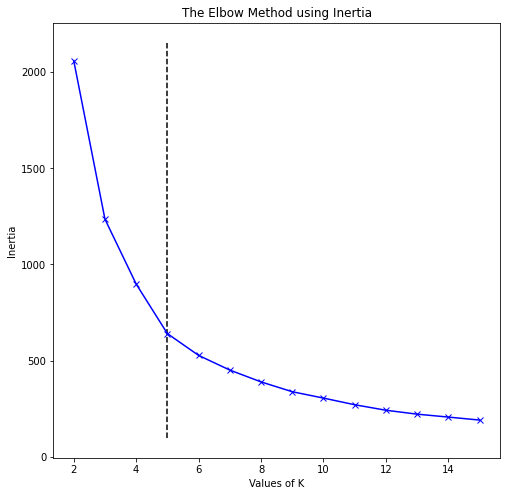

In [66]:
# clustering by the features latitude an longitude
ind=[0,1]
X_ind = np.vstack([Xn_train[:,ind],Xn_val[:,ind]])

silhouette_coefficients = []
inertias = []
K = range(2, 16)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X_ind)
    inertias.append(kmeanModel.inertia_)
    silhouette_coefficients.append(silhouette_score(X_ind, kmeanModel.labels_))
 
# Locate the knee
kn = KneeLocator(K, inertias, curve='convex', direction='decreasing')

plt.figure(figsize=(8, 8))
plt.plot(K, inertias, 'bx-')
y_lim = plt.ylim()
plt.vlines(kn.knee, y_lim[0], y_lim[1], linestyles='dashed', colors='k')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

From the above knee location, we can see that the optimal knee location is around 5 clusters. 

We will now assess the silhouette plot:

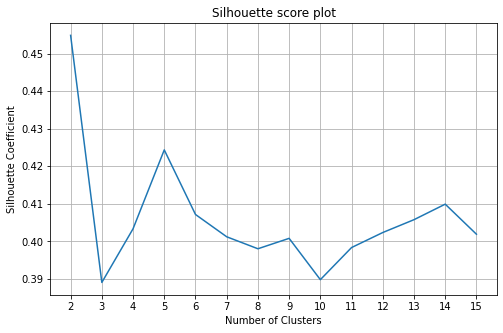

In [67]:
plt.figure(figsize=(8,5))
plt.title("Silhouette score plot")
plt.plot(range(2,16), silhouette_coefficients)
plt.xticks(range(2, 16))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.grid()
plt.show()

The silhouette plot is also indicating that a cluster number in the region of 5 would be suitable.

Upon various trials it was determined that a cluster number of 6 was optimal for the piecewise regression method given the chosen features and so will be used below:

### Performing Clustering

Clustering will now be performed on the dataset using a Gaussian Mixture model

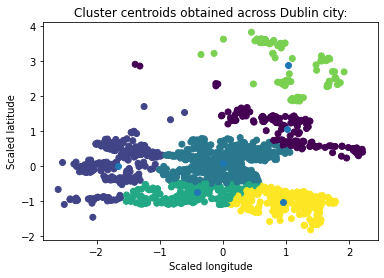

In [68]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=6)

# Gaussian Mixture
gmm.fit(X_ind)
# plot cluster colours
plt.scatter(X_ind[:,0],X_ind[:,1], c=gmm.predict(X_ind))
# centroids:  orange dots
plt.scatter(gmm.means_[:,0],gmm.means_[:,1])
plt.title("Cluster centroids obtained across Dublin city:")
plt.xlabel("Scaled longitude")
plt.ylabel("Scaled latitude")
plt.show()

### Clusters

We will now use the clustering model to separate the training data into the appropriate cluster:

In [69]:
# train clusters
clusters_train = gmm.predict(Xn_train[:,ind])
unique_train, counts_train = np.unique(clusters_train, return_counts=True)
print(f"Makeup of training data clusters: {dict(zip(unique_train, counts_train))}")

Makeup of training data clusters: {0: 126, 1: 200, 2: 491, 3: 193, 4: 74, 5: 217}


We can see from the above that each cluster has enough training data points

We will do the same for the test clusters:

In [70]:
# validation clusters
clusters_test = gmm.predict(Xn_val[:,ind])
unique_test, counts_test = np.unique(clusters_test, return_counts=True)

print(f"Makeup of validation data clusters: {dict(zip(unique_test, counts_test))}")

Makeup of validation data clusters: {0: 37, 1: 50, 2: 126, 3: 44, 4: 20, 5: 49}


We can again see that each cluster is well represented with test data points.

Separating the data out into cluster variables:

In [71]:
# cluster 0
Xn0 = Xn_train[clusters_train==0,:]
Xtestn0 = Xn_val[clusters_test==0,:]
ylog0 = np.log(y_train.astype('float')[clusters_train==0,:])
yscaler0 = StandardScaler().fit(ylog0)
yn0 = yscaler0.transform(ylog0)

In [72]:
# cluster 1
Xn1 = Xn_train[clusters_train==1,:]
Xtestn1 = Xn_val[clusters_test==1,:]
ylog1 = np.log(y_train.astype('float')[clusters_train==1,:])
yscaler1 = StandardScaler().fit(ylog1)
yn1 = yscaler1.transform(ylog1)

In [73]:
# cluster 2
Xn2 = Xn_train[clusters_train==2,:]
Xtestn2 = Xn_val[clusters_test==2,:]
ylog2 = np.log(y_train.astype('float')[clusters_train==2,:])
yscaler2 = StandardScaler().fit(ylog2)
yn2 = yscaler2.transform(ylog2)

In [74]:
# cluster 3
Xn3 = Xn_train[clusters_train==3,:]
Xtestn3 = Xn_val[clusters_test==3,:]
ylog3 = np.log(y_train.astype('float')[clusters_train==3,:])
yscaler3 = StandardScaler().fit(ylog3)
yn3 = yscaler3.transform(ylog3)

In [75]:
# cluster 4
Xn4 = Xn_train[clusters_train==4,:]
Xtestn4 = Xn_val[clusters_test==4,:]
ylog4 = np.log(y_train.astype('float')[clusters_train==4,:])
yscaler4 = StandardScaler().fit(ylog4)
yn4 = yscaler4.transform(ylog4)

In [76]:
# cluster 5
Xn5 = Xn_train[clusters_train==5,:]
Xtestn5 = Xn_val[clusters_test==5,:]
ylog5 = np.log(y_train.astype('float')[clusters_train==5,:])
yscaler5 = StandardScaler().fit(ylog5)
yn5 = yscaler5.transform(ylog5)

## Piecewise Model

We will now perform the Multinomial Logistic Regression on the various cluster datasets instantiated above. We will be instantiating and refining the parameters available in the linear equations. Namely:

 - $\alpha$, which is the intercept term:
 - $\beta$, which is a vector of coefficients which give a weighting to the importance of each input feature.
 
Initially a wide guess will be taken for the parameters which will then be honed.

In [77]:
# model_0
with pm.Model() as model_0:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn0.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn0.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn0[:,0])

with model_0:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior0 = approximation.sample(5000)

Finished [100%]: Average Loss = 165.21


In [78]:
# model_1
with pm.Model() as model_1:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn1.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn1.T)
  # likelihood, # 
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn1[:,0])
  
with model_1:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior1 = approximation.sample(5000)

Finished [100%]: Average Loss = 210.36


In [79]:
# model_2
with pm.Model() as model_2:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn2.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  # linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn2.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn2[:,0])
    
with model_2:
  # iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior2 = approximation.sample(5000)

Finished [100%]: Average Loss = 412.59


In [80]:
# model_3
with pm.Model() as model3:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn3.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  mu = alpha + pm.math.dot(beta, Xn3.T)#linear regression model in matrix form
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn3[:,0])
    
with model3:
  # number of iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior     
posterior3 = approximation.sample(5000)

Finished [100%]: Average Loss = 175.94


In [81]:
# model_4
with pm.Model() as model4:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn4.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  mu = alpha + pm.math.dot(beta, Xn4.T)#linear regression model in matrix form
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn4[:,0])
    
with model4:
  # number of iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior     
posterior4 = approximation.sample(5000)

Finished [100%]: Average Loss = 120.88


In [82]:
# model_5
with pm.Model() as model5:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn5.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  mu = alpha + pm.math.dot(beta, Xn5.T)#linear regression model in matrix form
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn5[:,0])
    
with model5:
  # number of iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior     
posterior5 = approximation.sample(5000)

Finished [100%]: Average Loss = 238.76


In [83]:
# Posterior predictive checks (PPCs)
def ppc(alpha,beta,sigma, X,  nsamples=500):
    #we select nsamples random samples from the posterior
    ind = np.random.randint(0,beta.shape[0],size=nsamples)
    alphai = alpha[ind]
    betai = beta[ind,:]
    sigmai = sigma[ind]

    Ypred = np.zeros((nsamples,X.shape[0]))
    for i in range(X.shape[0]):
        #we generate data from linear model
        y_pred = alphai + np.dot(betai, X[i:i+1,:].T).T +np.random.randn(len(sigmai))*sigmai
        Ypred[:,i]=y_pred[0,:]
    return Ypred

### Simulations

We will now perform simulations using the posteriors of the models. This is useful to show the the distribution of our model's predictions versus the true obervations: 

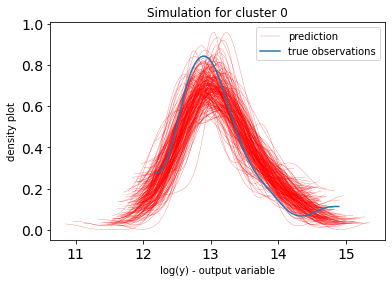

In [84]:
#Simulation
Ypred0 = yscaler0.inverse_transform(ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200))
for i in range(Ypred0.shape[0]):
    az.plot_dist( Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
az.plot_dist(ylog0,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");
plt.title("Simulation for cluster 0")
plt.show()

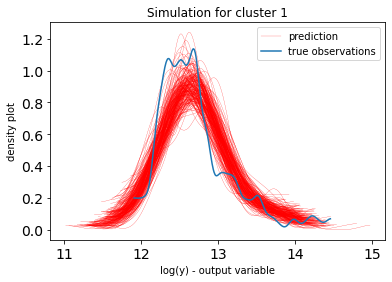

In [85]:
#Simulation
Ypred1 = yscaler1.inverse_transform(ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200))
for i in range(Ypred1.shape[0]):
    az.plot_dist( Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
az.plot_dist(ylog1,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");
plt.title("Simulation for cluster 1")
plt.show()

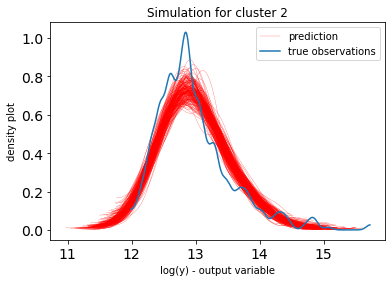

In [86]:
#Simulation
Ypred2 = yscaler2.inverse_transform(ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200))
for i in range(Ypred2.shape[0]):
    az.plot_dist( Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
az.plot_dist(ylog2,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");
plt.title("Simulation for cluster 2")
plt.show()

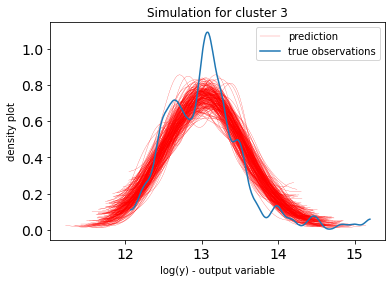

In [87]:
#Simulation
Ypred3 = yscaler3.inverse_transform(ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200))
for i in range(Ypred3.shape[0]):
    az.plot_dist( Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
az.plot_dist(ylog3,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");
plt.title("Simulation for cluster 3")
plt.show()

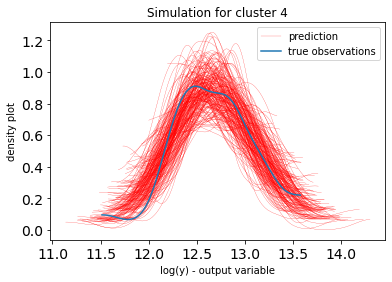

In [88]:
#Simulation
Ypred4 = yscaler4.inverse_transform(ppc(posterior4['alpha'],posterior4['beta'],posterior4['sigma_n'],Xn4,  nsamples=200))
for i in range(Ypred4.shape[0]):
    az.plot_dist( Ypred4[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred4[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
az.plot_dist(ylog4,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");
plt.title("Simulation for cluster 4")
plt.show()

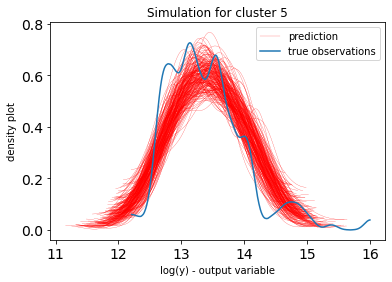

In [89]:
#Simulation
Ypred5 = yscaler5.inverse_transform(ppc(posterior5['alpha'],posterior5['beta'],posterior5['sigma_n'],Xn5,  nsamples=200))
for i in range(Ypred5.shape[0]):
    az.plot_dist( Ypred5[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred5[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
az.plot_dist(ylog5,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");
plt.title("Simulation for cluster 5")
plt.show()

## Overall Simulation

We can now perform an overall simulation by combining the various model predictions agains the true values:

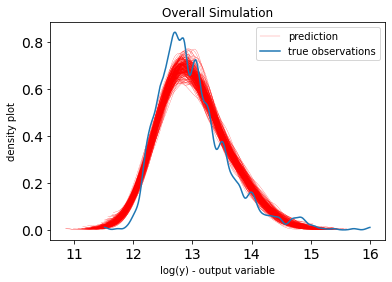

In [90]:
# posteriors
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200)
Ypred4 = ppc(posterior4['alpha'],posterior4['beta'],posterior4['sigma_n'],Xn4,  nsamples=200)
Ypred5 = ppc(posterior5['alpha'],posterior5['beta'],posterior5['sigma_n'],Xn5,  nsamples=200)

# simulation
Ypred = np.hstack([ yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3),
                 yscaler4.inverse_transform(Ypred4),
                 yscaler5.inverse_transform(Ypred5),
                 ])

# prediction
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})

# plot
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
ylog=np.vstack([
                ylog0, 
                ylog1, 
                ylog2, 
                ylog3, 
                ylog4, 
                ylog5,
              ])
az.plot_dist(ylog,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");
plt.title("Overall Simulation")
plt.show()

### Validation set performance

We will now calculate the validation performance of the piecewise approach for the validaton set:

In [91]:
# cluster 0
y_pred_BLR0 = np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) 
              + np.dot(np.mean(posterior0['beta'],axis=0), Xtestn0.T)))
print("------------------------")
print("CLUSTER 0")
print(f"Size: {np.sum(clusters_test==0)}")
print(f"MAE: {np.mean(abs(y_pred_BLR0 - y_val[clusters_test==0]))}")
print(f"MAPE: {np.mean(abs(y_pred_BLR0 - y_val[clusters_test==0]) /y_val[clusters_test==0])}")
print("------------------------")

# cluster 1
y_pred_BLR1 = np.exp(yscaler1.inverse_transform(np.mean(posterior1['alpha']) 
              + np.dot(np.mean(posterior1['beta'],axis=0), Xtestn1.T)))
print("------------------------")
print("CLUSTER 1")
print(f"Size: {np.sum(clusters_test==1)}")
print(f"MAE: {np.mean(abs(y_pred_BLR1 - y_val[clusters_test==1]))}")
print(f"MAPE: {np.mean(abs(y_pred_BLR1 - y_val[clusters_test==1]) /y_val[clusters_test==1])}")
print("------------------------")

# cluster 2
y_pred_BLR2 = np.exp(yscaler2.inverse_transform(np.mean(posterior2['alpha']) 
              + np.dot(np.mean(posterior2['beta'],axis=0), Xtestn2.T)))
print("------------------------")
print("CLUSTER 2")
print(f"Size: {np.sum(clusters_test==2)}")
print(f"MAE: {np.mean(abs(y_pred_BLR2 - y_val[clusters_test==2]))}")
print(f"MAPE: {np.mean(abs(y_pred_BLR2 - y_val[clusters_test==2]) /y_val[clusters_test==2])}")
print("------------------------")

# cluster 3
y_pred_BLR3 = np.exp(yscaler3.inverse_transform(np.mean(posterior3['alpha']) 
              + np.dot(np.mean(posterior3['beta'],axis=0), Xtestn3.T)))
print("------------------------")
print("CLUSTER 3")
print(f"Size: {np.sum(clusters_test==3)}")
print(f"MAE: {np.mean(abs(y_pred_BLR3 - y_val[clusters_test==3]))}")
print(f"MAPE: {np.mean(abs(y_pred_BLR3 - y_val[clusters_test==3]) /y_val[clusters_test==3])}")
print("------------------------")

# cluster 4
y_pred_BLR4 = np.exp(yscaler4.inverse_transform(np.mean(posterior4['alpha']) 
              + np.dot(np.mean(posterior4['beta'],axis=0), Xtestn4.T)))
print("------------------------")
print("CLUSTER 4")
print(f"Size: {np.sum(clusters_test==4)}")
print(f"MAE: {np.mean(abs(y_pred_BLR4 - y_val[clusters_test==4]))}")
print(f"MAPE: {np.mean(abs(y_pred_BLR4 - y_val[clusters_test==4]) /y_val[clusters_test==4])}")
print("------------------------")

# cluster 5
y_pred_BLR5 = np.exp(yscaler5.inverse_transform(np.mean(posterior5['alpha']) 
              + np.dot(np.mean(posterior5['beta'],axis=0), Xtestn5.T)))
print("------------------------")
print("CLUSTER 5")
print(f"Size: {np.sum(clusters_test==5)}")
print(f"MAE: {np.mean(abs(y_pred_BLR5 - y_val[clusters_test==5]))}")
print(f"MAPE: {np.mean(abs(y_pred_BLR5 - y_val[clusters_test==5]) /y_val[clusters_test==5])}")
print("------------------------")

# joint MAE
joint_mae=np.hstack([abs(y_pred_BLR0 - y_val[clusters_test==0]),
                 abs(y_pred_BLR1 - y_val[clusters_test==1]),
                 abs(y_pred_BLR2 - y_val[clusters_test==2]),
                 abs(y_pred_BLR3 - y_val[clusters_test==3]),
                 abs(y_pred_BLR4 - y_val[clusters_test==4]),
                 abs(y_pred_BLR5 - y_val[clusters_test==5]),
                 ])

# joint MAPE
joint_mape = np.mean(np.hstack([
                        abs(y_pred_BLR0 - y_val[clusters_test==0]) /y_val[clusters_test==0],
                        abs(y_pred_BLR1 - y_val[clusters_test==1]) /y_val[clusters_test==1],
                        abs(y_pred_BLR2 - y_val[clusters_test==2]) /y_val[clusters_test==2],
                        abs(y_pred_BLR3 - y_val[clusters_test==3]) /y_val[clusters_test==3],
                        abs(y_pred_BLR4 - y_val[clusters_test==4]) /y_val[clusters_test==4],
                        abs(y_pred_BLR5 - y_val[clusters_test==5]) /y_val[clusters_test==5],
                       ]))

from sklearn.metrics import mean_squared_error
from math import sqrt

joint_rms = np.mean(np.hstack([
                        sqrt(mean_squared_error(y_val[clusters_test==0], y_pred_BLR0)),
                        sqrt(mean_squared_error(y_val[clusters_test==1], y_pred_BLR1)),
                        sqrt(mean_squared_error(y_val[clusters_test==2], y_pred_BLR2)),
                        sqrt(mean_squared_error(y_val[clusters_test==3], y_pred_BLR3)),
                        sqrt(mean_squared_error(y_val[clusters_test==4], y_pred_BLR4)),
                        sqrt(mean_squared_error(y_val[clusters_test==5], y_pred_BLR5)),
                      ]))

print("------------------------")
print("JOINT PERFORMANCE")
# MAE
print("MAE:", np.mean(joint_mae))
# MAPE
print("MAPE:", joint_mape)
#RMSE
print("RMSE:", joint_rms)
print("------------------------")

------------------------
CLUSTER 0
Size: 37
MAE: 169206.97460599933
MAPE: 0.33958968108884435
------------------------
------------------------
CLUSTER 1
Size: 50
MAE: 72171.74005149174
MAPE: 0.1719870526856198
------------------------
------------------------
CLUSTER 2
Size: 126
MAE: 113511.93707158382
MAPE: 0.2075577100025886
------------------------
------------------------
CLUSTER 3
Size: 44
MAE: 65911.00786667778
MAPE: 0.12848059346462554
------------------------
------------------------
CLUSTER 4
Size: 20
MAE: 164462.4754552824
MAPE: 0.24700576495300997
------------------------
------------------------
CLUSTER 5
Size: 49
MAE: 385526.5385760669
MAPE: 0.2643426533387896
------------------------
------------------------
JOINT PERFORMANCE
MAE: 151079.39686957933
MAPE: 0.21736961263803317
RMSE: 333780.3904927179
------------------------


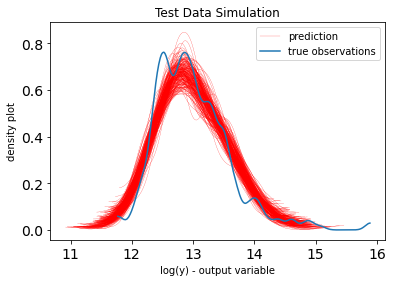

In [92]:
## Posterior predictive checks (PPCs)

num_samples2 = 200
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xtestn0, nsamples=num_samples2)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xtestn1, nsamples=num_samples2)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xtestn2, nsamples=num_samples2)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xtestn3, nsamples=num_samples2)
Ypred4 = ppc(posterior4['alpha'],posterior4['beta'],posterior4['sigma_n'],Xtestn4, nsamples=num_samples2)
Ypred5 = ppc(posterior5['alpha'],posterior5['beta'],posterior5['sigma_n'],Xtestn5, nsamples=num_samples2)

# Stack arrays in sequence horizontally (column wise)
Ypred = np.hstack([yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3),
                 yscaler4.inverse_transform(Ypred4),
                 yscaler5.inverse_transform(Ypred5),
                 ])

# plot prediction shape
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})
# label
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")

# true observations
az.plot_dist(np.log(y_val),label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");
plt.title("Test Data Simulation")
plt.show()

# BAYESIAN NN

A [Bayesian network](https://en.wikipedia.org/wiki/Bayesian_network) (also known as a Bayes network, Bayes net, belief network, or decision network) is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 

* Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. 
* For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. 
* Given symptoms, the network can be used to compute the probabilities of the presence of various diseases.

In [93]:
# Training set, taking the input columns added and excluding the true price values
Xn_train = df_Xn_train[all_features_inc_NLP].values

Xn_val = df_Xn_val[all_features_inc_NLP].values

#### Bayesian Neural Network excluding NLP features

Firstly we will run the Bayesian Neural Network on the features excluding the NLP and we will contrast this later with the model trained with NLP features also to determine which to use for the hyper parameters and features for the model training on all training data for the submission. 

In [94]:
# add a column of ones to include an intercept in the model
x1 = np.hstack([np.ones((Xn_train.shape[0],1)), Xn_train])

floatX = theano.config.floatX

l = 15
# Initialize random weights between each layer
# we do that to help the numerical algorithm that computes the posterior
init_1 = np.random.randn(x1.shape[1], l).astype(floatX)
init_out = np.random.randn(l).astype(floatX)

# pymc3 model as neural_network
with pm.Model() as neural_network:
    # we convert the data in theano type so we can do dot products with the correct type.
    ann_input = pm.Data('ann_input', x1)
    ann_output = pm.Data('ann_output', yn_train)
    # Priors 
    # Weights from input to hidden layer
    weights_in_1 = pm.Normal('w_1', 0, sigma=10,
                             shape=(x1.shape[1], l), testval=init_1)
    # Weights from hidden layer to output
    weights_2_out = pm.Normal('w_0', 0, sigma=10,
                              shape=(l,),testval=init_out)

    # Build neural-network using tanh activation function
    # Inner layer
    act_1 = pm.math.tanh(pm.math.dot(ann_input,weights_in_1))
    # Linear layer, like in Linear regression
    act_out = pm.Deterministic('act_out',pm.math.dot(act_1, weights_2_out))

    # standard deviation of noise
    sigma = pm.HalfCauchy('sigma',5)

    # Normal likelihood
    out = pm.Normal('out',
                       act_out,
                       sigma=sigma,
                       observed=ann_output[:,0])

In [95]:
# we can do instead an approximated inference
param3 = 80000 # start with 1000, then use 50000+
VI = 'advi'  # 'advi', 'fullrank_advi', 'svgd', 'asvgd', 'nfvi'
OP = pm.adam # pm.adam, pm.sgd, pm.adagrad, pm.adagrad_window, pm.adadelta
LR = 0.0008    

with neural_network:
    approx = pm.fit(param3, method=VI, obj_optimizer=pm.adam(learning_rate=LR))

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Finished [100%]: Average Loss = 1,017.9


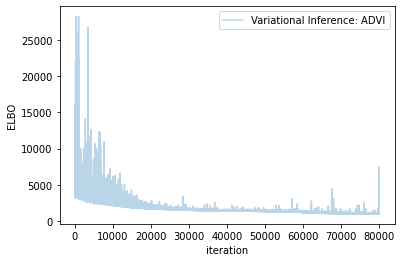

In [96]:
# plot 
pb.plot(approx.hist, label='Variational Inference: '+ VI.upper(), alpha=.3)
pb.legend(loc='upper right')
# Evidence Lower Bound (ELBO)
# https://en.wikipedia.org/wiki/Evidence_lower_bound
pb.ylabel('ELBO')
pb.xlabel('iteration');

In [97]:
# draw samples from variational posterior
D = 300
posterior = approx.sample(draws=D)

In [98]:
# add a column of ones to include an intercept in the model
x2 = np.hstack([np.ones((Xn_val.shape[0],1)), Xn_val])

y_pred = []
for i in range(posterior['w_1'].shape[0]):
    #inner layer
    t1 = np.tanh(np.dot(posterior['w_1'][i,:,:].T,x2.T))
    #outer layer
    y_pred.append(np.dot(posterior['w_0'][i,:],t1))

# predictions   
y_pred = np.array(y_pred).mean(axis=0)

In [99]:
# prediction
y_pred_BNN = np.exp(scaler_y_with_split.inverse_transform(y_pred))
print("MAE = ",(np.mean(abs(y_pred_BNN - y_val))))
print("MAPE = ",(np.mean(abs(y_pred_BNN - y_val) / y_val)))

from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_val, y_pred_BNN))
print("RMSE = ", rms)

MAE =  117460.44960809364
MAPE =  0.17594317042950638
RMSE =  329170.2961413507


#### Bayesian Neural Network excluding NLP features

We will now see how the Bayesian Neural Network does on the dataset including the NLP features.

In [100]:
# Training set, taking the input columns added and excluding the true price values
Xn_train = df_Xn_train[featrain].values

Xn_val = df_Xn_val[featrain].values

In [101]:
# add a column of ones to include an intercept in the model
x1 = np.hstack([np.ones((Xn_train.shape[0],1)), Xn_train])

floatX = theano.config.floatX

l = 15
# Initialize random weights between each layer
# we do that to help the numerical algorithm that computes the posterior
init_1 = np.random.randn(x1.shape[1], l).astype(floatX)
init_out = np.random.randn(l).astype(floatX)

# pymc3 model as neural_network
with pm.Model() as neural_network:
    # we convert the data in theano type so we can do dot products with the correct type.
    ann_input = pm.Data('ann_input', x1)
    ann_output = pm.Data('ann_output', yn_train)
    # Priors 
    # Weights from input to hidden layer
    weights_in_1 = pm.Normal('w_1', 0, sigma=10,
                             shape=(x1.shape[1], l), testval=init_1)
    # Weights from hidden layer to output
    weights_2_out = pm.Normal('w_0', 0, sigma=10,
                              shape=(l,),testval=init_out)

    # Build neural-network using tanh activation function
    # Inner layer
    act_1 = pm.math.tanh(pm.math.dot(ann_input,weights_in_1))
    # Linear layer, like in Linear regression
    act_out = pm.Deterministic('act_out',pm.math.dot(act_1, weights_2_out))

    # standard deviation of noise
    sigma = pm.HalfCauchy('sigma',5)

    # Normal likelihood
    out = pm.Normal('out',
                       act_out,
                       sigma=sigma,
                       observed=ann_output[:,0])

In [102]:
# we can do instead an approximated inference
param3 = 80000 # start with 1000, then use 50000+
VI = 'advi'  # 'advi', 'fullrank_advi', 'svgd', 'asvgd', 'nfvi'
OP = pm.adam # pm.adam, pm.sgd, pm.adagrad, pm.adagrad_window, pm.adadelta
LR = 0.0008    

with neural_network:
    approx = pm.fit(param3, method=VI, obj_optimizer=pm.adam(learning_rate=LR))

Finished [100%]: Average Loss = 862.16


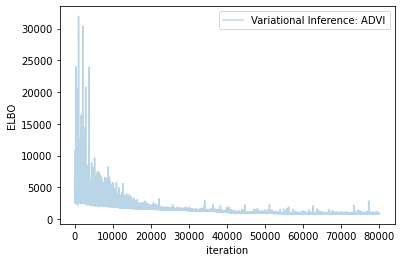

In [103]:
# plot 
pb.plot(approx.hist, label='Variational Inference: '+ VI.upper(), alpha=.3)
pb.legend(loc='upper right')
# Evidence Lower Bound (ELBO)
# https://en.wikipedia.org/wiki/Evidence_lower_bound
pb.ylabel('ELBO')
pb.xlabel('iteration');

In [104]:
# draw samples from variational posterior
D = 300
posterior = approx.sample(draws=D)

In [105]:
# add a column of ones to include an intercept in the model
x2 = np.hstack([np.ones((Xn_val.shape[0],1)), Xn_val])

y_pred = []
for i in range(posterior['w_1'].shape[0]):
    #inner layer
    t1 = np.tanh(np.dot(posterior['w_1'][i,:,:].T,x2.T))
    #outer layer
    y_pred.append(np.dot(posterior['w_0'][i,:],t1))

# predictions   
y_pred = np.array(y_pred).mean(axis=0)

In [106]:
# prediction
y_pred_BNN = np.exp(scaler_y_with_split.inverse_transform(y_pred))
print("MAE = ",(np.mean(abs(y_pred_BNN - y_val))))
print("MAPE = ",(np.mean(abs(y_pred_BNN - y_val) / y_val)))

from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_val, y_pred_BNN))
print("RMSE = ", rms)

MAE =  106609.56538176509
MAPE =  0.1547232351819447
RMSE =  319209.47779732035


## Running Bayesian Neural Network on Kaggle Test Set

Since the Bayesian Neural Network is clearly giving the best results. We will use this model to do the predicitions on the test set for the submission to Kaggle.

In [107]:
# Training set, taking the input columns added and excluding the true price values
Xn = df_Xn[featrain].values

Xn_test = df_Xn_test[featrain].values

yn_test = df_yn[['Price']].values

In [108]:
# add a column of ones to include an intercept in the model
x1 = np.hstack([np.ones((Xn.shape[0],1)), Xn])


floatX = theano.config.floatX

l = 15
# Initialize random weights between each layer
# we do that to help the numerical algorithm that computes the posterior
init_1 = np.random.randn(x1.shape[1], l).astype(floatX)
init_out = np.random.randn(l).astype(floatX)

# pymc3 model as neural_network
with pm.Model() as neural_network:
    # we convert the data in theano type so we can do dot products with the correct type.
    ann_input = pm.Data('ann_input', x1)
    ann_output = pm.Data('ann_output', yn_test)
    # Priors 
    # Weights from input to hidden layer
    weights_in_1 = pm.Normal('w_1', 0, sigma=1,
                             shape=(x1.shape[1], l), testval=init_1)
    # Weights from hidden layer to output
    weights_2_out = pm.Normal('w_0', 0, sigma=1,
                              shape=(l,),testval=init_out)

    # Build neural-network using tanh activation function
    # Inner layer
    act_1 = pm.math.tanh(pm.math.dot(ann_input,weights_in_1))
    # Linear layer, like in Linear regression
    act_out = pm.Deterministic('act_out',pm.math.dot(act_1, weights_2_out))

    # standard deviation of noise
    sigma = pm.HalfCauchy('sigma',5)

    # Normal likelihood
    out = pm.Normal('out',
                       act_out,
                       sigma=sigma,
                       observed=ann_output[:,0])

In [109]:
# we can do instead an approximated inference
param3 = 100000 # start with 1000, then use 50000+
VI = 'advi'  # 'advi', 'fullrank_advi', 'svgd', 'asvgd', 'nfvi'
OP = pm.adam # pm.adam, pm.sgd, pm.adagrad, pm.adagrad_window, pm.adadelta
LR = 0.0008    

with neural_network:
    approx = pm.fit(param3, method=VI, obj_optimizer=pm.adam(learning_rate=LR))

Finished [100%]: Average Loss = 868.93


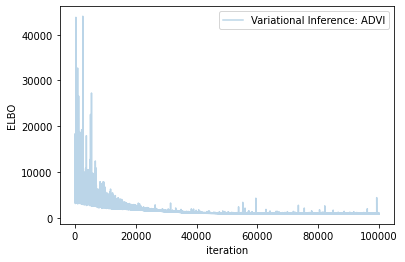

In [110]:
# plot 
pb.plot(approx.hist, label='Variational Inference: '+ VI.upper(), alpha=.3)
pb.legend(loc='upper right')
# Evidence Lower Bound (ELBO)
# https://en.wikipedia.org/wiki/Evidence_lower_bound
pb.ylabel('ELBO')
pb.xlabel('iteration');

In [111]:
# draw samples from variational posterior
D = 300
posterior = approx.sample(draws=D)

In [112]:
# add a column of ones to include an intercept in the model
x2 = np.hstack([np.ones((Xn_test.shape[0],1)), Xn_test])

y_pred = []
for i in range(posterior['w_1'].shape[0]):
    #inner layer
    t1 = np.tanh(np.dot(posterior['w_1'][i,:,:].T,x2.T))
    #outer layer
    y_pred.append(np.dot(posterior['w_0'][i,:],t1))

# predictions   
y_pred = np.array(y_pred).mean(axis=0)

In [113]:
# prediction
y_pred_BNN = np.exp(scaler_y.inverse_transform(y_pred))


In [114]:
SubmissionFormatBayesianNN = pd.concat([df_test['Index'], pd.DataFrame(y_pred_BNN, columns=['Price'])], axis=1)
SubmissionFormatBayesianNN.to_csv('KaggleFormattedBayesianNN.csv',index=False)

# SUMMARY

**Data Preparation**
- Initially I imported the data to a dataframe
- I then performed some Exploratory Data Analysis
- Then I dealt with some outliers in the number of beds, bathrooms, longitude and latitude
- I then plotted a heatmap of the price across Dublin City
- I removed some outliers for the surface attribute, both in terms of some very large outliers and some unrealistically small examples also
- Initially I was tempted to use the Services attribute to create a new feature which I called has_parking and would be true if the Services column contained the word Parking. This was an attempt to use domain knowledge that availability of parking can affect a property price. Later I abandoned this approach in favour of using more advanced NLP to extract such type of information from the textual fields.
- I then went about encoding the BER values, I chose to encode it in an ordinal fashion, setting NaNs to the mean. I was unsure whether to treat BER exempt homes as being on the lower extreme of the ordinal scale or use the mean for these also. In the end I did not choose to put those values on the lower end of the scale.
- I one hot encoded the Type column and got some useful features in doing so such as the 'Type_detached' and the 'Type_apartment'
- I then examined the distributions using box plots and histograms and based on these I determined the transformations and scaling required. 
- I then created a data transformation and scaling pipeline so that I would be able to create a training and validation set as well as the overall training and test set. I used the pipeline to carry out the required transforms and scaling: log scaled the Number of Bathrooms, Number of Beds and the Surface attributes to get them to more normal distributions. I also standard scaled the Latitude, Longitude and BER class
- I then split the training data to obtain a validation set. Many thanks to Mike Scally for the collaboration in finding out that it is better to reshape the y training values after the split rather than before, this was something I overlooked, and which was affecting the results being achieved until Mike suggested the correct approach to the reshaping. I later found an alternative method altogether using pandas. 
- I then plot a correlation map to see which features had the highest and most noteworthy correlations with the Price attribute. I could see that 'Longitude', 'Latitude', 'Surface', 'Num_Beds', 'Num_Bathrooms', 'Type_detached', 'Type_apartment' had the most significant correlations and so I chose these as the features to use going forward. 

Scaled features showing the strongest correlation with price:
  - Longitude => 0.26
  - Latitude => -0.17
  - Surface => 0.69
  - Num_Beds => 0.45
  - Num_Bathrooms => 0.43
  - Type_detached => 0.43
  - Type_apartment => -0.24

**NLP**

I used NLP to extract some additional features from the dataset in order to make use of the textual columns “Description” and “Features”. The strings of words were cleaned, tokenized and the stop words removed. The tokens were then joined back together and the TfidfVectorizer extracted the TF-IDF scores for the vocabulary in the examples. 

The approach was to take the vocabulary that scored the highest in terms of the correlation of TF_IDF score with Price but that were also well represented in terms of their counts within the data.

So I got the most correlated with price and the most represented vocabulary and from that pulled out the 10 best vocabulary items to use. 
I then trained a full Bayesian model on the data, once with the additional NLP features and once without. Here are their scores in the latest run so that we can contrast them: 

Model score without NLP features:
 - MAE =  151169.06791416294
 - MAPE =  0.22534112027062336
 - RMSE =  412330.1312040598

Model sore with NLP features:
 - MAE =  144277.74816817706
 - MAPE =  0.21404737456000525
 - RMSE =  410809.35225869826

We can see from the above that there is a marked improvement when we train the model using the NLP features. This shows that we have successfully garnered useful information form the textual features.

**Piecewise Model**

For the piecewise section, where there are a lot fewer training examples in each cluster than in the overall, only a model excluding the NLP features is used to avoid problems with overfitting due to too many features with too little data per cluster.

The optimal number of clusters to use was homed in upon using the k-means algorithm in conjunction with the elbow method and the silhouette method (Umargono, Suseno and S. K., 2019). Both approaches were indicating that a cluster number of 5 was likely to be about right. I experimented with varying numbers of clusters and saw that about 6 clusters gave the lowest error so I decided that 6 clusters was optimal for the chosen features, and this was the number of clusters used for the etivity. 

Gaussian Mixture clustering (Melchior and Goulding, 2018), which is an unsupervised clustering method, was chosen to cluster the data based on latitude and longitude. With the clusters obtained the models were retrained on the subsets of data as is standard in the piecewise approach (Germano, 2020). Again, the MAE and MAPE scores were obtained both for the models individually and collectively.

Useful simulations were also carried out which compared a range of predicted price values using the posteriors with the actual price values from the dataset. These plots are very useful and intuitive and showed that the model was able to smooth out the noisier true distributions.

Piecewise Model Performance

 - MAE: 151079.39686957933
 - MAPE: 0.21736961263803317
 - RMSE: 333780.3904927179

From the above metrics we can see the piecewise method gives a performance improvement over the single model that was trained without the NLP features included. But with the NLP features included the single model outperforms the piecewise. As indicated by Germano (2020), the model was able to capitalise on the fact that there were slightly different relationships between the variables in each cluster. Each model could then specialise on its own data cluster and adapt to the nuances it contained. 

The baseline model was slightly over generalising across the dataset because it consisted of a single universal model. With the NLP features included however the single model was able to improve its performance beyond that of the piecewise as it was able to leverage additional information to make more accurate predictions. As discussed with Robert Barrett in the forum, the clustering is done on the latitude and longitude features and then the training of each individual model is done using all the chosen features but only for data within the cluster. Piecewise models allow us to home in on variance within the clusters yet maintain an overview on the more general trends. The trade-off however still exists between bias and variance, with the risk of underfitting being mitigated by the more nuanced models but leading into a risk of overfitting if we use too many constituent clusters. 

**Bayesian Neural Network Models**

I then trained Bayesian Neural Network models. Once on the features excluding the NLP features and once including the NLP features. As discussed with Team 3 on the forum I found that tweaking I found that increasing the number of iterations and lowering the learning rate were the two most important factors for me when trying to improve the model accuracy. 

Here were the results of the latest runs which shows that the Bayesian Neural Network is a lot more accurate in its ability to learn to predict the house prices:

Bayesian Neural Network Results with NLP Features included:
 - MAE =  117460.44960809364
 - MAPE =  0.17594317042950638
 - RMSE =  329170.2961413507

Bayesian Neural Network Results without NLP Features included:
 - MAE =  106609.56538176509
 - MAPE =  0.1547232351819447
 - RMSE =  319209.47779732035

This shows that the model is clearly more accurate on without the additional NLP features. For this reason I chose to use the Bayesian Neural Network model with the tuned hyperparamters and trained on the features excluding the NLP ones as the basis for the Kaggle submission. 

The model trained on all the training data was quite accurate and is giving an initial RSME result of **0.22696 on Kaggle** of when tested on 70% of the data.

Further tuning of the hyperparameters would yield more accurate results. Something like Gridsearch could be used to obtained the best performing.
There is always room for further improvement, especially in terms of the NLP. Taking bigram and trigrams would lead to improved accuracy in terms of the information extracted from text (Solso, Barbuto and Juel, 1979). 


### References

Ahtesham, M., Bawany, N.Z. and Fatima, K. (2020) ‘House Price Prediction using Machine Learning Algorithm - The Case of Karachi City, Pakistan’, in 2020 21st International Arab Conference on Information Technology (ACIT). 2020 21st International Arab Conference on Information Technology (ACIT), pp. 1–5. doi:10.1109/ACIT50332.2020.9300074.

Brownlee, J. (2017) ‘What Is Natural Language Processing?’, Machine Learning Mastery, 21 September. Available at: https://machinelearningmastery.com/natural-language-processing/ (Accessed: 15 October 2021).

Germano, M.F. (2020) Piecewise Linear Regression Model. What Is It and When Can We Use It?, Medium. Available at: https://towardsdatascience.com/piecewise-linear-regression-model-what-is-it-and-when-can-we-use-it-93286cfee452 (Accessed: 14 October 2021).

Goldberg, Y. (2017) Neural Network Methods in Natural Language Processing. Edited by G. Hirst. San Rafael, Calif.: Morgan & Claypool Publishers.

Minka, T.P. (1999) Bayesian Linear Regression. 3594 Security Ticket Control.

NLTK :: Natural Language Toolkit (no date). Available at: https://www.nltk.org/ (Accessed: 16 October 2021).

‘Segmented regression’ (2021) Wikipedia. Available at: https://en.wikipedia.org/w/index.php?title=Segmented_regression&oldid=1030201444 (Accessed: 15 October 2021).

Solso, R.L., Barbuto, P.F. and Juel, C.L. (1979) ‘Bigram and trigram frequencies and versatilities in the English language’, Behavior Research Methods & Instrumentation, 11(5), pp. 475–484. doi:10.3758/BF03201360.

Umargono, E., Suseno, J.E. and S. K., V.G. (2019) ‘K-Means Clustering Optimization using the Elbow Method and Early Centroid Determination Based-on Mean and Median’:, in Proceedings of the International Conferences on Information System and Technology. International Conferences on Information System and Technology, Yogyakarta, Indonesia: SCITEPRESS - Science and Technology Publications, pp. 234–240. doi:10.5220/0009908402340240.

‘What is a Bayesian Neural Network?’ (no date) Databricks. Available at: https://databricks.com/glossary/bayesian-neural-network (Accessed: 14 October 2021).

What is Natural Language Processing? An Introduction to NLP (no date) SearchEnterpriseAI. Available at: https://searchenterpriseai.techtarget.com/definition/natural-language-processing-NLP (Accessed: 17 October 2021).

What is Overfitting? (2021). Available at: https://www.ibm.com/cloud/learn/overfitting (Accessed: 18 October 2021).

Yang, X. et al. (2019) ‘Piecewise Linear Regression Based on Plane Clustering’, IEEE Access, 7, pp. 29845–29855. doi:10.1109/ACCESS.2019.2902620.

Yse, D.L. (2019) Your Guide to Natural Language Processing (NLP), Medium. Available at: https://towardsdatascience.com/your-guide-to-natural-language-processing-nlp-48ea2511f6e1 (Accessed: 15 October 2021).